Clustering

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

#맨해튼 거리(Manhattan Distance): 두 점 사이의 직각으로 이루어진 거리 측정
#유클리드 거리(Euclidean Distance): 두 점 사이의 직선 거리를 피타고라스의 정리를 사용해 계산
#둘 다 두 점 사이의 거리를 측정하는데 사용되지만, 거리를 측정하는 방법에 따라 선택해야 할 적절한 거리 측정 방법이 달라짐

In [2]:
from sklearn.datasets import load_wine #13개의 컬럼. 13개의 차원으로 이루어진 벡터
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [4]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

#PCA(주성분 분석)하기 전에 스케일링
#MinaxScaler: 각 특성의 최솟값과 최댓값을 사용하여 데이터를 [0, 1]범위로

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [7]:
data.shape #차원을 2개만 씀

(178, 2)

##### 1) 모델 불러오기 및 정의하기

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2022)

##### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [9]:
kmeans.fit(data) #K-means 알고리즘을 사용하여 데이터를 클러스터링하고, 각 데이터 포인트를 가장 가까운 중심에 할당

KMeans(n_clusters=3, random_state=2022)

In [10]:
df = pd.DataFrame({
    'PC1':data[:,0], 'PC2':data[:,1],
    'target':wine.target, 'cluster':kmeans.labels_
})
df.head()

#주성분 분석(PCA)을 통해 얻은 첫번째 주성분(PC1), 두번째 주성분(PC2). 2차원
#주성분 값(PC1, PC2), 원래 타겟 값, K-means클러스터링 결과인 클러스터 레이블로 구성 

,PC1,PC2,target,cluster
0,-0.706336,-0.253193,0,0
1,-0.484977,-0.008823,0,0
2,-0.521172,-0.189187,0,0
3,-0.821644,-0.580906,0,0
4,-0.202546,-0.059467,0,0


In [11]:
kmeans.cluster_centers_ #각 클러스터의 중심점

array([[-0.48503975, -0.17742871],
       [ 0.59750634, -0.21895939],
       [ 0.01701227,  0.36612572]])

##### 3) 클러스터 할당

In [12]:
cluster = kmeans.predict(data)
#각 데이터 포인트를 가장 가까운 클러스터에 할당 => 각 데이터 포인트가 어떤 클러스터에 속하는지를 예측

##### 4) 결과 살펴보기

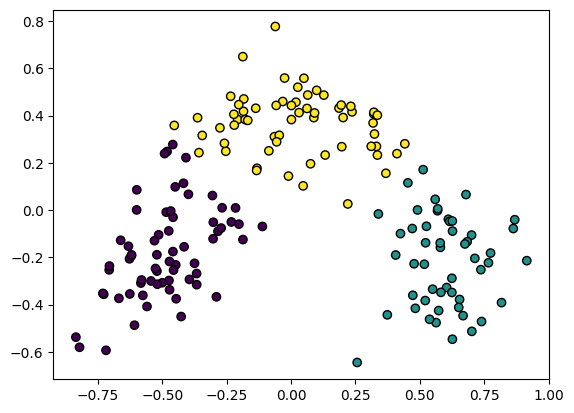

In [13]:
plt.scatter(data[:, 0], data[:, 1], c=cluster, linewidth=1, edgecolor='black')
#c=cluster: 각 데이터 포인트를 나타내는 색을 지정
#linewidth: 데이터 포인트 주변의 선의 너비

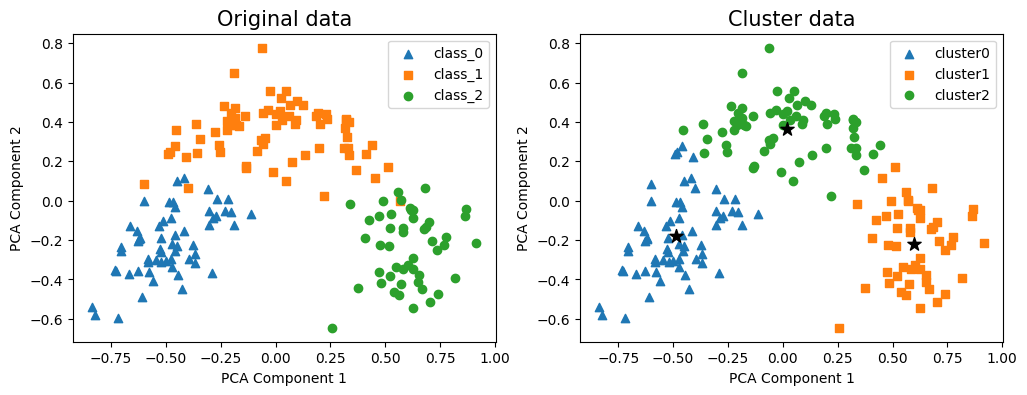

In [14]:
markers = ['^','s','o']
plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend() #범례
    plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2') #x축, y축

Hierarchical Clustering

Single Linkage

##### 1) 모델 불러오기 및 정의하기

In [15]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single') #linkage = "ward", "complete", "average", "single"

#Hierarchical Clustering: 거리(Distance)와 유사도(Similarity)를 기반으로 클러스터를 형성
#k-means clustering과 달리 클러스터의 수를 설정해줄 필요 없음. 클러스터의 형태를 시각적으로 표현해주는 덴드로그램을 통해 적정한 클러스터의 수를 선택 가능

##### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [16]:
single_clustering.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

##### 3) 클러스터 할당

In [17]:
single_cluster = single_clustering.labels_

##### 4) 결과 살펴보기

- 산점도

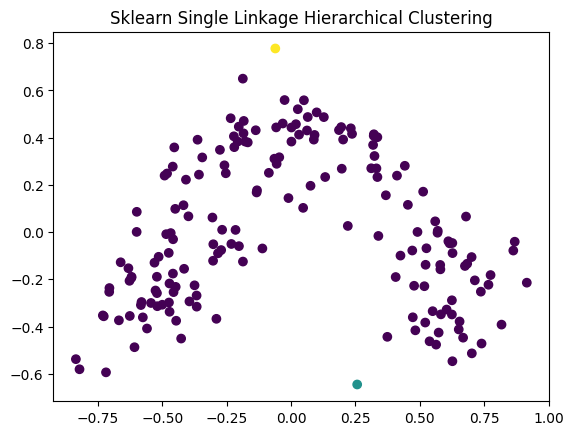

In [18]:
plt.scatter(data[:,0], data[:,1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()

- 덴드로그램

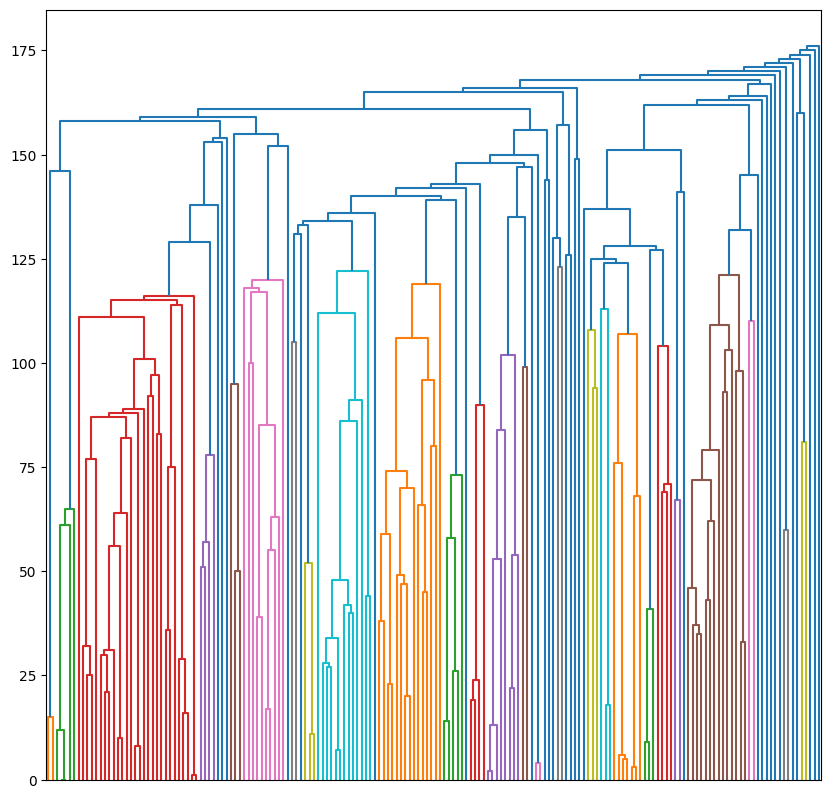

In [19]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

#클러스터 간 거리와 관련된 정보
children = single_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)

#계층적 클러스터링의 결과
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p = len(data), labels = single_cluster,
           show_contracted=True, no_labels = True, )
plt.show()

#덴드로그램: 계층적 클러스터링(hierarchical clustering) 결과를 시각화
#데이터 포인트들을 가지와 가지의 길이로 표현하며, 가지의 길이는 클러스터 간의 거리를 나타냄

Complete Linkage

##### 1) 모델 불러오기 및 정의하기

In [20]:
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')

#AgglomerativeClustering: 계층적 군집화(Hierarchical)를 수행하는 알고리즘. bottom-up 방식으로 동작
#각 클러스터의 중심이나 클러스터의 개수를 미리 지정할 필요가 없으며, 계층적인 클러스터링 결과를 얻을 수 있음

##### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [21]:
complete_clustering.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

##### 3) 클러스터 할당

In [22]:
complete_cluster = complete_clustering.labels_

##### 4) 결과 살펴보기

- 산점도

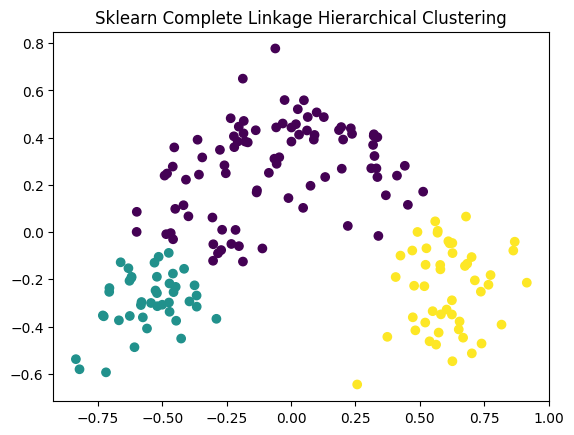

In [23]:
plt.scatter(data[:,0], data[:,1], c=complete_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clustering')
plt.show()

- 덴드로그램

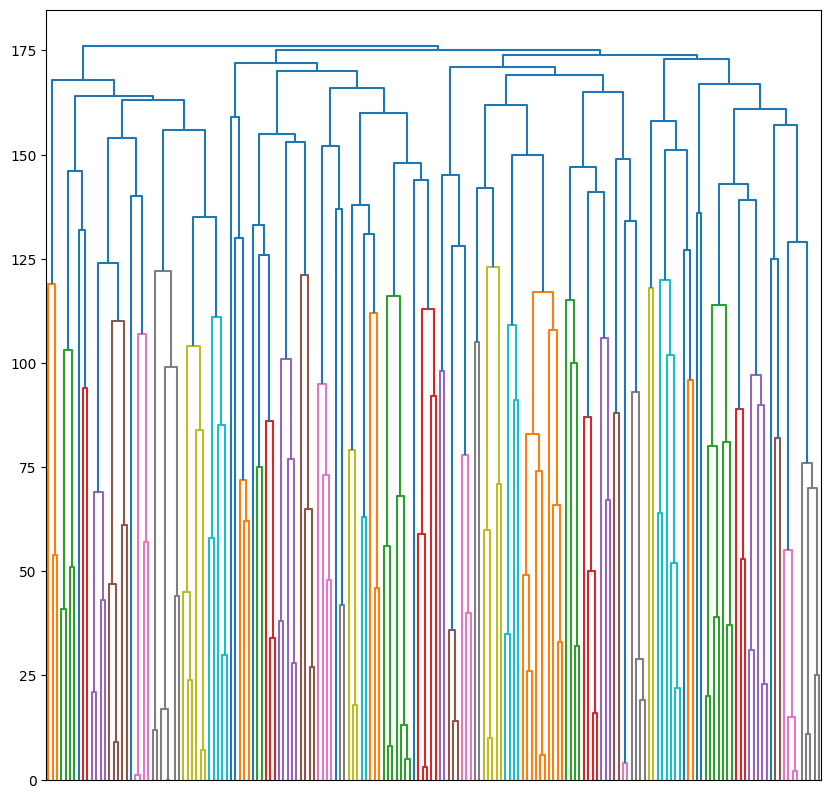

In [24]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

#'children', 'distance', 'no_of_observations'을 계산해 linkage matrix 생성
children = complete_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

#linkage matrix를 이용해 dendrogram 생성
dendrogram(linkage_matrix, p = len(data), labels = complete_cluster,
           show_contracted = True, no_labels = True)
plt.show()

#p: 데이터 포인트의 개수, labels: 각 데이터 포인터가 속한 클러스터를 나타내는 레이블
#show_contracted: 덴드로그램을 확대하여 표시할지 여부, no_labels: 덴드로그램에 라벨을 표시할지 여부
#덴드로그램: 계층적 클러스터링 결과를 트리 형태로 시각화. 각 노드는 클러스터를, 가지의 길이는 클러스터 간의 길이를 나타냄

Average Linkage

##### 1) 모델 불러오기 및 정의하기

In [25]:
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

##### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [26]:
average_clustering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

##### 3) 클러스터 할당

In [27]:
average_cluster = average_clustering.labels_

##### 4) 결과 살펴보기

- 산점도

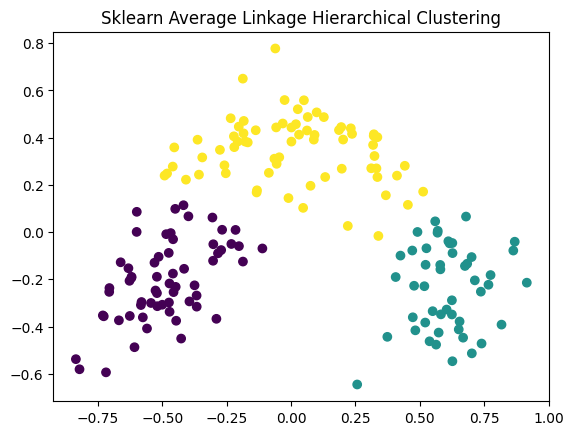

In [28]:
plt.scatter(data[:,0], data[:,1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()

- 덴드로그램

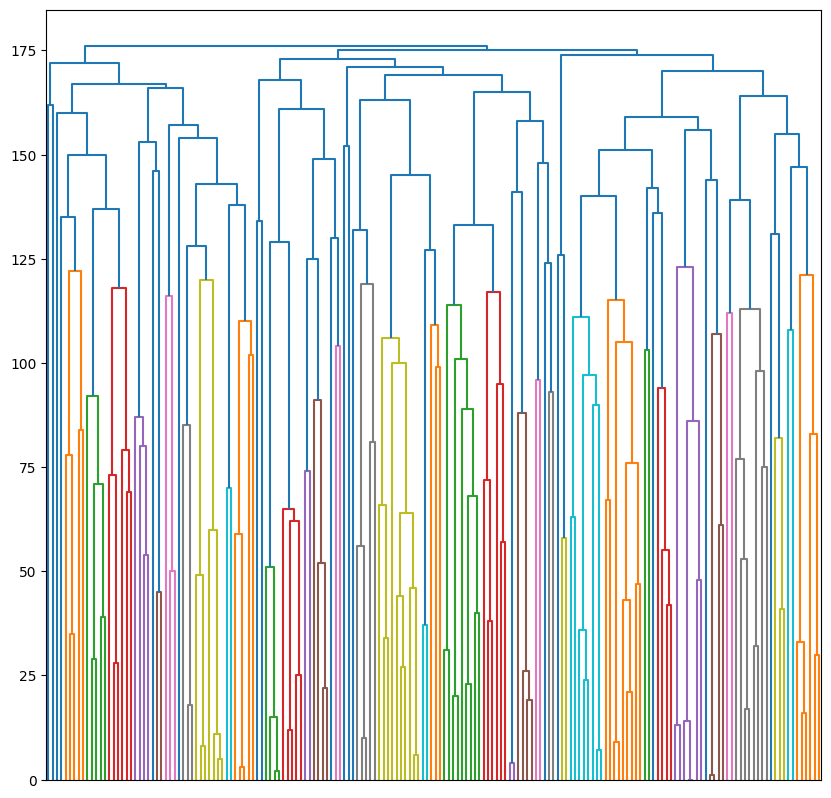

In [29]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

children = average_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p = len(data), labels = average_cluster,
           show_contracted=True, no_labels = True, )
plt.show()

클러스터링 결과 비교하기

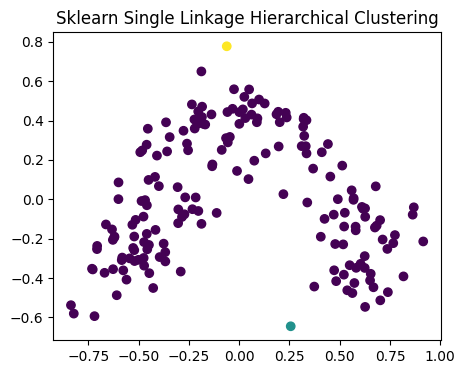

In [30]:
plt.figure(figsize=(5,4))

plt.scatter(data[:,0], data[:,1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()

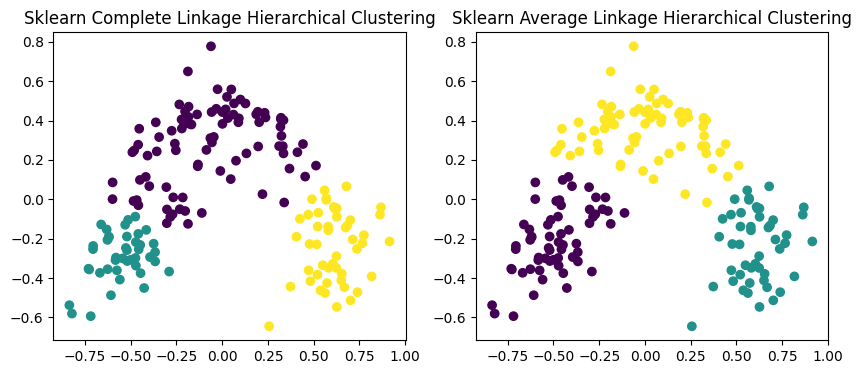

In [31]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(data[:,0], data[:,1], c=complete_cluster) #complete_cluster에 따라 색상 지정
plt.title('Sklearn Complete Linkage Hierarchical Clustering')

plt.subplot(1, 2, 2)
plt.scatter(data[:,0], data[:,1], c=average_cluster) #average_cluster에 따라 색상 지정
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()

silhouette

##### 1) k-means

In [32]:
#가장 높은 실루엣 점수 찾기
from sklearn.metrics import silhouette_score

#silhouette_score: 클러스터링의 품질을 평가하는 지표
#클러스터 간의 거리가 얼마나 떨어져 있는지 측정
#실루엣 값은 -1 ~ 1까지의 범위. 값이 높을수록 클러스터가 잘 형성되어있음을 의미

In [33]:
best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)

    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

#최적의 클러스터 개수=실루엣 점수가 가장 높은 값

클러스터의 수 : 2, 실루엣 점수 : 0.49
클러스터의 수 : 3, 실루엣 점수 : 0.57
클러스터의 수 : 4, 실루엣 점수 : 0.50
클러스터의 수 : 5, 실루엣 점수 : 0.45
클러스터의 수 : 6, 실루엣 점수 : 0.43
클러스터의 수 : 7, 실루엣 점수 : 0.37
클러스터의 수 : 8, 실루엣 점수 : 0.36
클러스터의 수 : 9, 실루엣 점수 : 0.39
클러스터의 수 : 10, 실루엣 점수 : 0.41
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.57


##### 2) Average Linkage Hierarchical Clustering

In [34]:
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    average_clustering = AgglomerativeClustering(n_clusters= n_cluster, linkage='average')
    average_clustering.fit(data)
    cluster = average_clustering.labels_
    score = silhouette_score(data, cluster)

    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2, 실루엣 점수 : 0.49
클러스터의 수 : 3, 실루엣 점수 : 0.56
클러스터의 수 : 4, 실루엣 점수 : 0.48
클러스터의 수 : 5, 실루엣 점수 : 0.42
클러스터의 수 : 6, 실루엣 점수 : 0.37
클러스터의 수 : 7, 실루엣 점수 : 0.34
클러스터의 수 : 8, 실루엣 점수 : 0.34
클러스터의 수 : 9, 실루엣 점수 : 0.37
클러스터의 수 : 10, 실루엣 점수 : 0.33
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.56


실루엣 분석 - 군집평가 실습

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

- Iris Data로 군집화 평가

In [36]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [37]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2022)

In [38]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['target'] = iris.target #df에 Iris Data의 타겟 변수를 추가
df['cluster'] = kmeans.labels_ #K-means 클러스터링 결과를 나타내는 라벨을 df에 추가
df.head()

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


- 실루엣 계수

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(iris_std, kmeans.labels_)
df['실루엣 계수'] = sil_samples
df.head()

#실루엣 계수: 클러스터링 결과의 품질을 평가하는 지표. 1에 가까울수록(=실루엣 계수가 높을수록) 샘플이 잘 클러스터링되어있음

,sl,sw,pl,pw,target,cluster,실루엣 계수
0,5.1,3.5,1.4,0.2,0,0,0.732506
1,4.9,3.0,1.4,0.2,0,0,0.561526
2,4.7,3.2,1.3,0.2,0,0,0.673783
3,4.6,3.1,1.5,0.2,0,0,0.615350
4,5.0,3.6,1.4,0.2,0,0,0.727078


- 실루엣 스코어 (실루엣 계수의 평균)

In [40]:
silhouette_score(iris_std, kmeans.labels_)

0.45663380641237455

In [41]:
df['실루엣 계수'].mean()

0.45663380641237455

In [42]:
df.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.633181
1    0.330415
2    0.407854
Name: 실루엣 계수, dtype: float64

- 실루엣 계수의 시각화

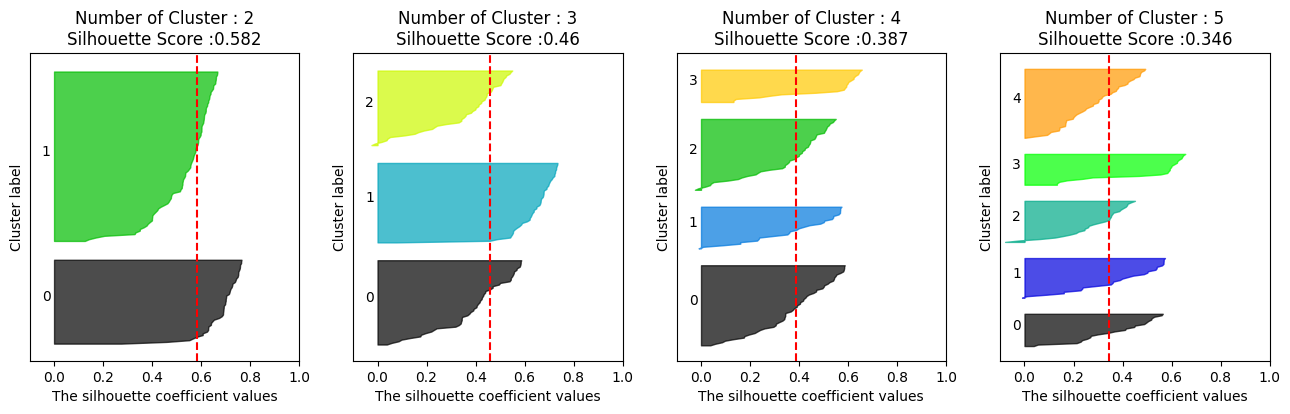

In [44]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], iris_std)